In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})

In [2]:
import plumed

### Equilibrium run

In [3]:
colvar=plumed.read_as_pandas("colvarA.dat")

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/daviddesancho/opt/anaconda3/envs/plumed-masterclass/lib/libplumedKernel.dylib" +++


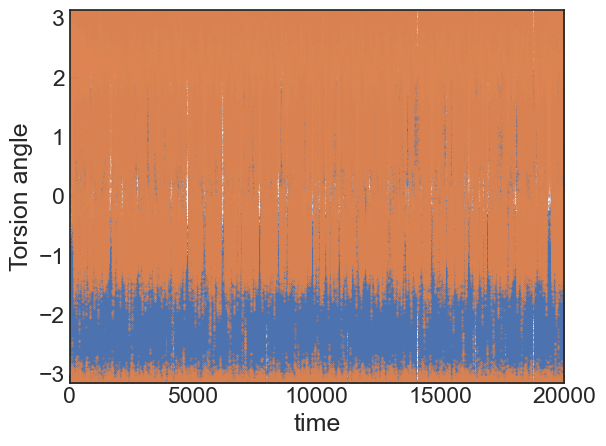

In [4]:
fig, ax = plt.subplots()
ax.plot(colvar.time,colvar.phi,".", ms=0.5, label="$\phi$")
ax.plot(colvar.time,colvar.psi,".", ms=0.5, label="$\psi$")

ax.set_ylim(-np.pi, np.pi)
ax.set_xlim(colvar.time[0], np.max(colvar.time))
ax.set_xlabel("time")
ax.set_ylabel("Torsion angle")

plt.tight_layout()

In [5]:
hills=plumed.read_as_pandas("HILLS")

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/daviddesancho/opt/anaconda3/envs/plumed-masterclass/lib/libplumedKernel.dylib" +++


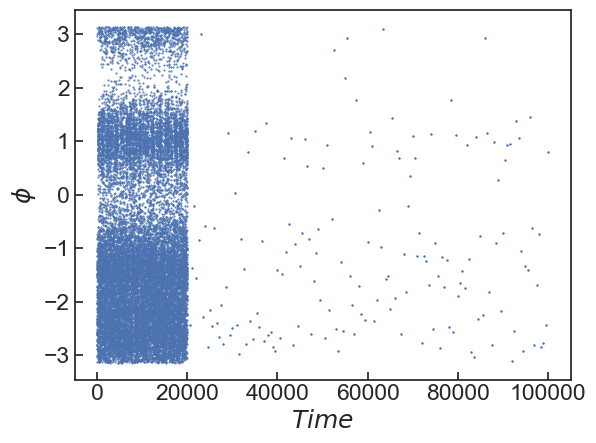

In [6]:
fig, ax = plt.subplots()
ax.plot(hills.time, hills.phi,"o", ms=0.5)
ax.set_xlabel("$Time$")
ax.set_ylabel("$\phi$")
plt.show()

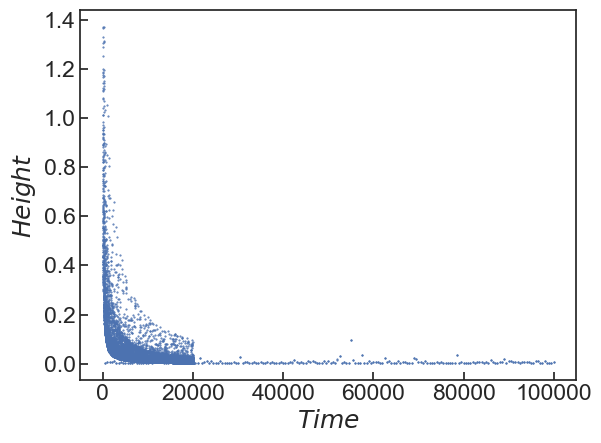

In [7]:
fig, ax = plt.subplots()
ax.plot(hills.time, hills.height,"o", ms=0.5)
ax.set_xlabel("$Time$")
ax.set_ylabel("$Height$")
plt.show()

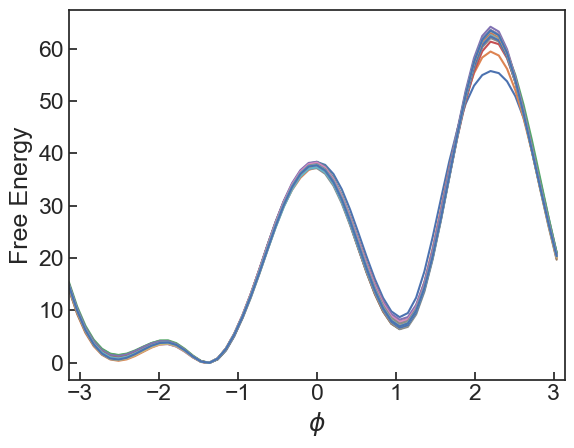

<Figure size 640x480 with 0 Axes>

In [8]:
fig, ax = plt.subplots()
for i in range(21):
    fes = np.loadtxt("fes_%i.dat"%i)
    ax.plot(fes[:,0], fes[:,1])
ax.set_xlim((-np.pi,np.pi))
#ax.set_ylim((-2,10))
ax.set_xlabel("$\phi$")
ax.set_ylabel("Free Energy")
plt.show()
plt.tight_layout()

In [9]:
fes_phi = plumed.read_as_pandas("ffphi.dat").replace([np.inf, -np.inf], \
                                                     np.nan).dropna()
fes_psi = plumed.read_as_pandas("ffpsi.dat").replace([np.inf, -np.inf], \
                                                     np.nan).dropna()

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/daviddesancho/opt/anaconda3/envs/plumed-masterclass/lib/libplumedKernel.dylib" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/daviddesancho/opt/anaconda3/envs/plumed-masterclass/lib/libplumedKernel.dylib" +++


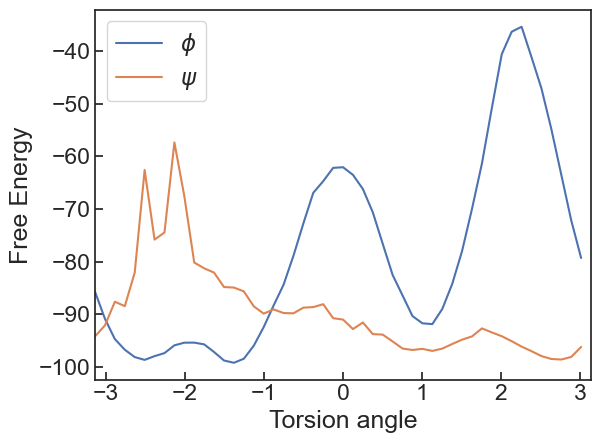

<Figure size 640x480 with 0 Axes>

In [10]:
fig, ax = plt.subplots()
ax.plot(fes_phi.phi,fes_phi.ffphi,label="$\phi$")
ax.plot(fes_psi.psi,fes_psi.ffpsi,label="$\psi$")
ax.set_xlim((-np.pi,np.pi))
#ax.set_ylim((-2,10))
ax.set_xlabel("Torsion angle")
ax.set_ylabel("Free Energy")
plt.legend()
plt.show()
plt.tight_layout()

In [11]:
colvar2d =plumed.read_as_pandas("colvarA2d.dat")

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/daviddesancho/opt/anaconda3/envs/plumed-masterclass/lib/libplumedKernel.dylib" +++


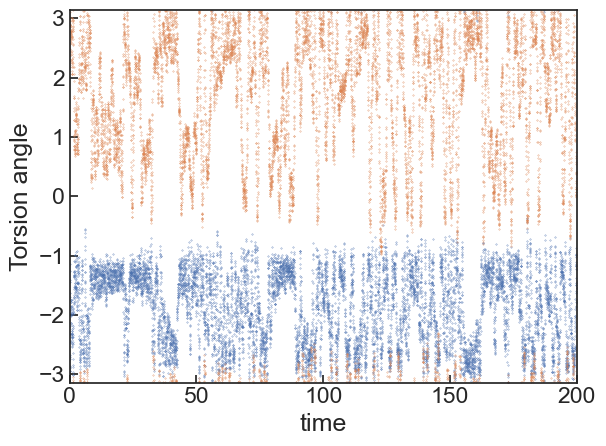

In [12]:
fig, ax = plt.subplots()
ax.plot(colvar2d.time,colvar2d.phi,".", ms=0.5, label="$\phi$")
ax.plot(colvar2d.time,colvar2d.psi,".", ms=0.5, label="$\psi$")

ax.set_ylim(-np.pi, np.pi)
ax.set_xlim(colvar2d.time[0], np.max(colvar2d.time))
ax.set_xlabel("time")
ax.set_ylabel("Torsion angle")
plt.tight_layout()

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/daviddesancho/opt/anaconda3/envs/plumed-masterclass/lib/libplumedKernel.dylib" +++


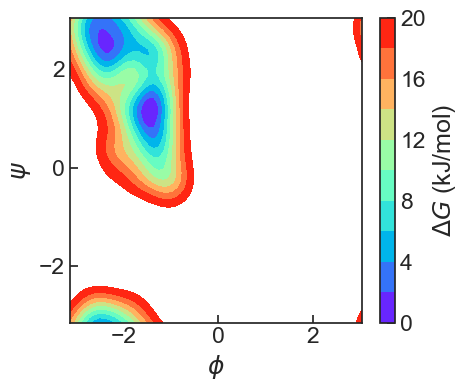

In [15]:
# plot final fes
data=plumed.read_as_pandas("fes.dat")
# get data for countour plot
phi = np.array(data["phi"]).reshape(60,60)
psi = np.array(data["psi"]).reshape(60,60)
fes = np.array(data["file.free"]).reshape(60,60)
#plot
from matplotlib import ticker, cm
fig, ax = plt.subplots(figsize=(5,4.25))
#plt.contour(phi, psi, fes, levels=range(0,20,5), \
#            linewidths=0.5, colors='gray')
cntr = plt.contourf(phi, psi, fes, levels=range(0,21,2), cmap=cm.rainbow)
plt.colorbar(cntr, label="$\Delta G$ (kJ/mol)")
ax.set_xlabel('$\phi$')
ax.set_ylabel('$\psi$')
plt.tight_layout()
plt.savefig("../../docs/img/meta2d.png", dpi=170)